In [1]:
import numpy as np
import heartpy as hp
import pywt
from scipy.signal import resample
import matplotlib.pyplot as plt

In [2]:
sample_rate = 100

In [3]:
ecg_signals = np.load('X_train.npy')

In [4]:
# Select an example ecg signal
signal = ecg_signals[3][:,8]

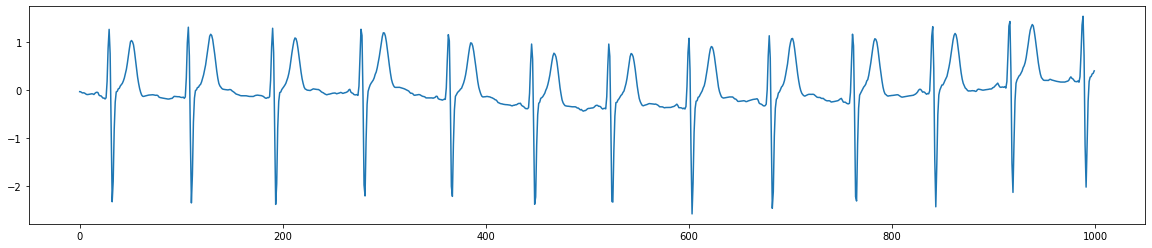

In [5]:
# Show the signal
plt.figure(figsize=(20,4))
plt.plot(signal)
plt.show()

In [6]:
# Get signal characteristic
working_data, measures = hp.process(signal, sample_rate=sample_rate, windowsize=10)

/home/josemiguelarana/.local/lib/python3.6/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 7200x288 with 0 Axes>

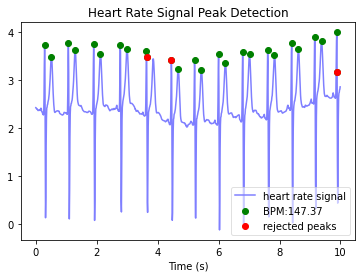

bpm: 147.368421
ibi: 407.142857
sdnn: 180.109566
sdsd: 38.467888
rmssd: 359.956138
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 150.000000
sd1: 254.134237
sd2: 27.241609
s: 21749.326159
sd1/sd2: 9.328900
breathingrate: 0.116959


In [7]:
#visualise the signal using the library
plt.figure(figsize=(100,4))
hp.plotter(working_data, measures)
plt.show()

#display computed measures
for measure in measures.keys():
    print('%s: %f' %(measure, measures[measure]))

In [8]:
# Apply Notch filter to reduce noise
filtered_data = hp.remove_baseline_wander(signal, sample_rate)

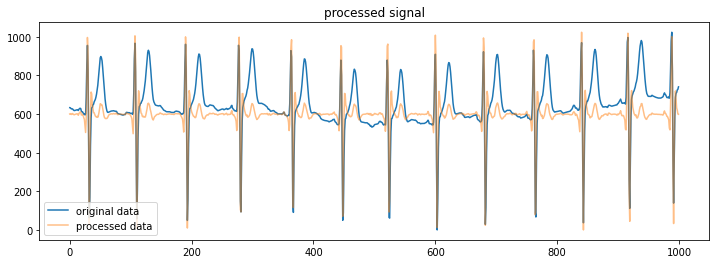

In [9]:
# Show difference between original signal and filtered signal
plt.figure(figsize=(12,4))
plt.title('original signal')
plt.plot(hp.scale_data(signal), label='original data')
plt.title('processed signal')
plt.plot(hp.scale_data(filtered_data), alpha=0.5, label='processed data')
plt.legend()
plt.show()

In [10]:
# Get filtered signal characteristic
wd, m = hp.process(hp.scale_data(filtered_data), sample_rate)

/home/josemiguelarana/.local/lib/python3.6/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

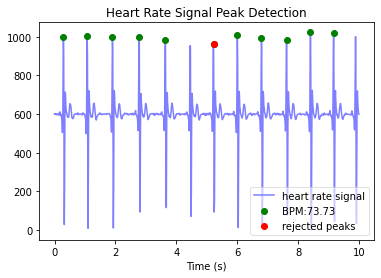

bpm: 73.732719
ibi: 813.750000
sdnn: 39.980464
sdsd: 13.437096
rmssd: 40.620192
pnn20: 0.666667
pnn50: 0.000000
hr_mad: 30.000000
sd1: 28.111880
sd2: 47.507309
s: 4195.659079
sd1/sd2: 0.591738
breathingrate: 0.307220


In [14]:
# Show signal
plt.figure(figsize=(12,4))
hp.plotter(wd, m)
plt.show()

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [12]:
# Perform single continuous wavelet transform
scales = np.arange(1, 31)
coef, freqs = pywt.cwt(filtered_data, scales, 'morl', sampling_period=1/sample_rate, method='fft')

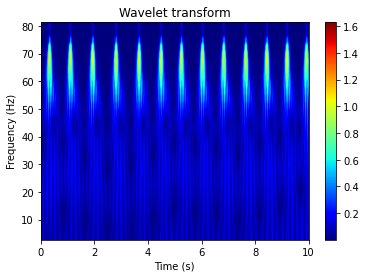

In [15]:
# Show the wavelet transform
plt.imshow(abs(coef), cmap='jet', aspect='auto', extent=[0, 10, freqs[-1], freqs[0]])
plt.colorbar()
plt.title('Wavelet transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()